## Main Goal
In this project, we aim to examine the performance of various machine learning models for predicting sales of video games based on their attributes!  

### Data Understanding
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com].
1. **Rank** - Ranking of overall sales
2. **Name** - The games name
3. **Platform** - Platform of the games release (i.e. PC,PS4, etc.)
4. **Year** - Year of the game's release
5. **Genre** - Genre of the game
6. **Publisher** - Publisher of the game
7. **NA_Sales** - Sales in North America (in millions)
8. **EU_Sales** - Sales in Europe (in millions)
9. **JP_Sales** - Sales in Japan (in millions)
10. **Other_Sales** - Sales in the rest of the world (in millions)
11. **Global_Sales** - Total worldwide sales.

Dataset is downloaded from: [https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("datasets/vgsales.csv")

In [4]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
dataset.shape

(16598, 11)

In [6]:
dataset.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Dealing With Null values
We assume that there are no underlying patterns in 'Year' and 'Publisher' missing values, and the missing values happened randomly!  
So therefore we remove the rows that have missing values!

In [7]:
# Drop rows with missing values in 'year' and 'publisher'
cleaned_dataset = dataset.dropna(subset=['Year', 'Publisher'])

In [8]:
cleaned_dataset.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### Exploratory Data Analysis
#### What is the overall distribution of Global_Sales and do any outliers stand out in this distribution?

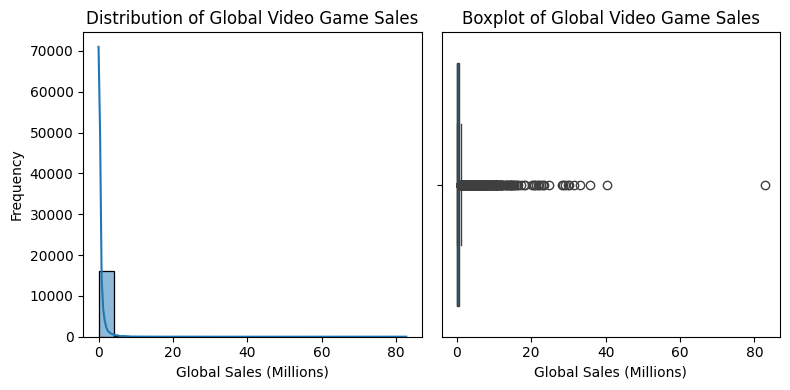

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(data=cleaned_dataset, x='Global_Sales', bins=20, kde=True, ax=axes[0])
axes[0].set_xlabel('Global Sales (Millions)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Global Video Game Sales')

# Boxplot on the right
sns.boxplot(x=cleaned_dataset['Global_Sales'], ax=axes[1])
axes[1].set_xlabel('Global Sales (Millions)')
axes[1].set_title('Boxplot of Global Video Game Sales')

# Adjust layout and display
plt.tight_layout()
plt.show()

> Most of the games have 'Global_Sales' around 1-5 millions copies! There are also many single games that have sold more than the "average range" therefore the plots show lots of outliers!

#### How have average and median Global_Sales evolved by release year?

In [10]:
df_grouped = cleaned_dataset.groupby('Year')['Global_Sales'].agg(['mean', 'median']).reset_index()

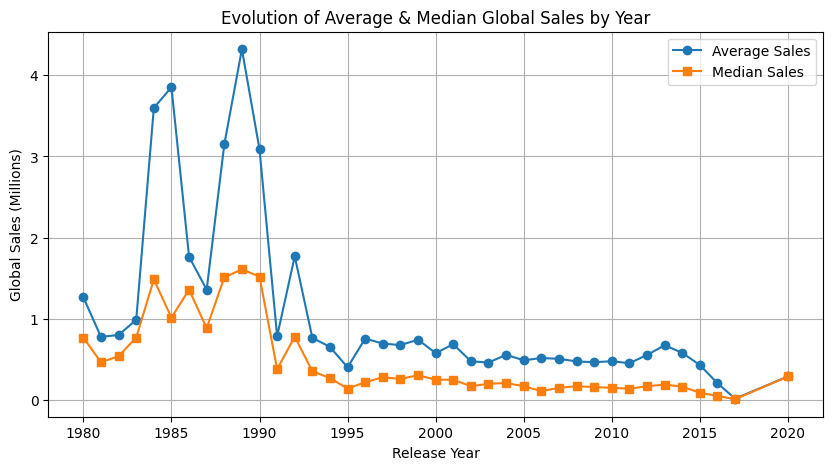

In [11]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df_grouped['Year'], df_grouped['mean'], label='Average Sales', marker='o')
plt.plot(df_grouped['Year'], df_grouped['median'], label='Median Sales', marker='s')

plt.xlabel('Release Year')
plt.ylabel('Global Sales (Millions)')
plt.title('Evolution of Average & Median Global Sales by Year')
plt.legend()
plt.grid()
plt.show()

> The large fluctuations in **average sales** suggest that a few blockbuster games significantly impacted the market between 1984 and 1990. Meanwhile, the smaller fluctuations in **median sales** indicate that most games had relatively stable sales, with only a few outliers driving major spikes in the average. This pattern suggests that while a handful of big hits dominated sales early on, the overall market became more consistent over time!

#### Which platforms (PC, PS4, etc.) tend to have the highest and lowest Global_Sales distributions?

In [12]:
platform_sales = cleaned_dataset.groupby('Platform')['Global_Sales'].mean().reset_index()

In [13]:
top_5_platforms = platform_sales.nlargest(5, 'Global_Sales')
bottom_5_platforms = platform_sales.nsmallest(5, 'Global_Sales')

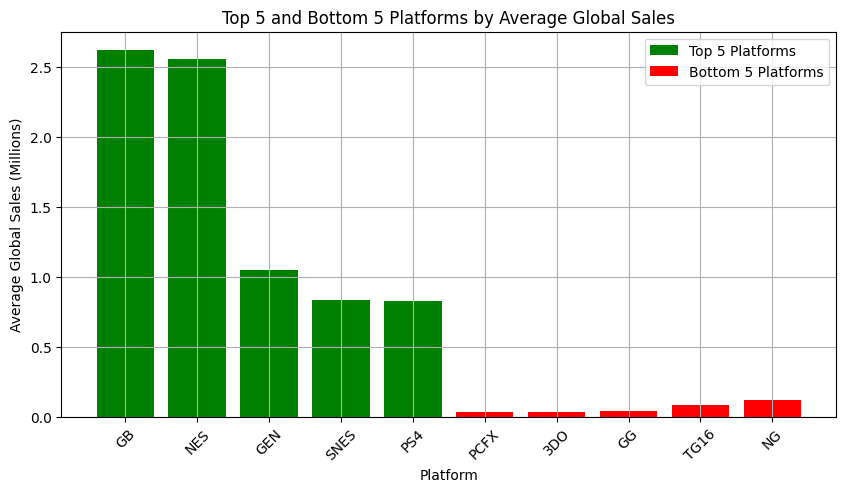

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(top_5_platforms['Platform'], top_5_platforms['Global_Sales'], color='green', label='Top 5 Platforms')
plt.bar(bottom_5_platforms['Platform'], bottom_5_platforms['Global_Sales'], color='red', label='Bottom 5 Platforms')

plt.xlabel('Platform')
plt.ylabel('Average Global Sales (Millions)')
plt.title('Top 5 and Bottom 5 Platforms by Average Global Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

> The GameBoy, NES and GEN, followed by GEN, SNES and PS4 are the top 5 platforms in average global sales (millions)!  
The PCFX, 3DO and GG, followed by TG16 and NG are the bottom 5 platforms in average global sales (millions)!  

#### How do different genres (Action, Sports, RPG, etc.) compare in terms of average and variance of Global_Sales?

In [15]:
genre_sales = cleaned_dataset.groupby('Genre')['Global_Sales'].agg(['mean', 'var']).reset_index()

In [16]:
# Sort by mean sales and select top 5 genres
top_5_genres = genre_sales.sort_values(by='mean', ascending=False).head(5)

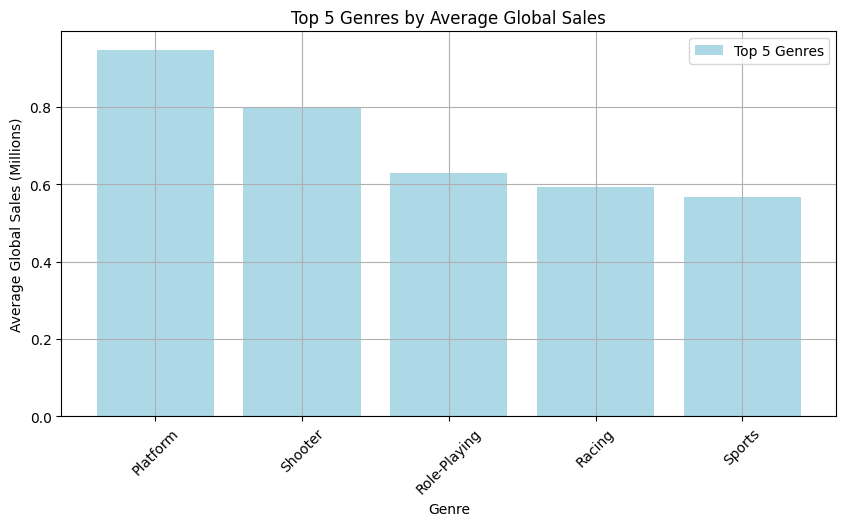

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(top_5_genres['Genre'], top_5_genres['mean'], color='lightblue', label='Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales (Millions)')
plt.title('Top 5 Genres by Average Global Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

> Platformer, Shooter, Role-Playing, Racing and Sports games are the top 5 genres of games with highest average global sales!  

#### Which publishers consistently produce top‐selling games, and how does their portfolio’s sales distribution look?

In [18]:
publishers_sales = cleaned_dataset.groupby('Publisher')['Global_Sales'].mean().reset_index()

In [19]:
# Sort and get top 5 publishers
top_5_publishers = publishers_sales.sort_values(by='Global_Sales', ascending=False).head(5)

In [20]:
# Filter dataset for only top publishers
df_top_publishers = cleaned_dataset[cleaned_dataset['Publisher'].isin(top_5_publishers['Publisher'])]

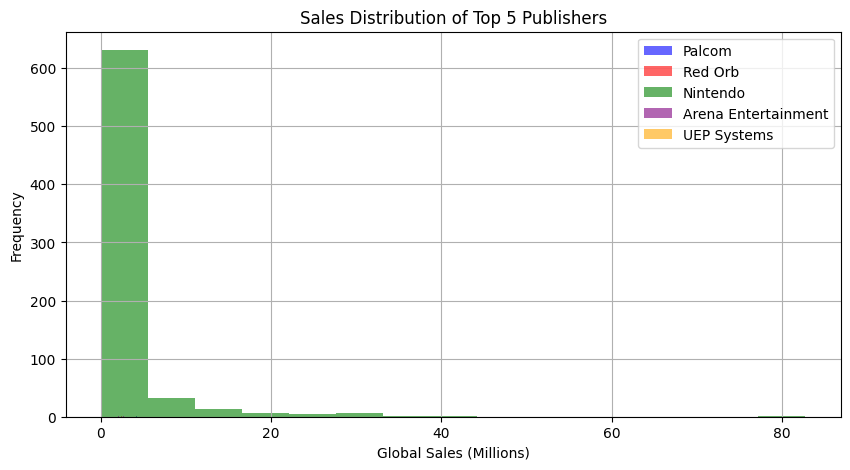

In [21]:
# Plot Sales Distribution
plt.figure(figsize=(10, 5))
colors = ['blue', 'red', 'green', 'purple', 'orange']  # Different colors for each publisher

for i, publisher in enumerate(top_5_publishers['Publisher']):
    subset = df_top_publishers[df_top_publishers['Publisher'] == publisher]
    plt.hist(subset['Global_Sales'], bins=15, alpha=0.6, label=publisher, color=colors[i])

plt.xlabel('Global Sales (Millions)')
plt.ylabel('Frequency')
plt.title('Sales Distribution of Top 5 Publishers')
plt.legend()
plt.grid()
plt.show()

> It seems that the Nintendo platform is the only publisher that constantly performed best!  

#### How strongly do regional sales (NA_Sales, EU_Sales, JP_Sales, Other_Sales) correlate with Global_Sales and with each other?

In [22]:
# Compute correlation matrix
sales_corr = cleaned_dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

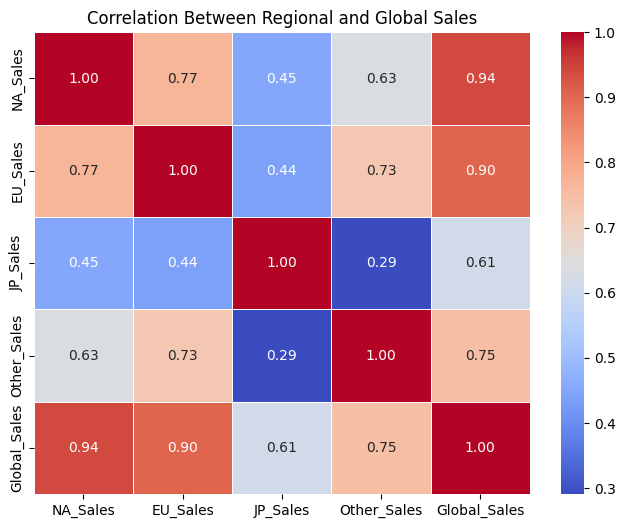

In [23]:
# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(sales_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Between Regional and Global Sales')
plt.show()

> 'NA_Sales' and 'EU_Sales' have very strong positive correlations of (0.94) and (0.90) respectively with 'Global_Sales'!  
'JP_Sales' has positive correlation of (0.61) with 'Global_Sales'!  
'Other_Sales' has also a positive correlation (0.75) with 'Global_Sales'!

#### For each game, what percentage of its Global_Sales comes from each region, and which regions dominate on average?

In [25]:
cleaned_dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
# Avoid division by zero errors
positive_global_sales = cleaned_dataset[cleaned_dataset['Global_Sales'] > 0]

In [29]:
# Calculate percentage contributions
positive_global_sales['NA_Percent'] = (positive_global_sales['NA_Sales'] / positive_global_sales['Global_Sales']) * 100
positive_global_sales['EU_Percent'] = (positive_global_sales['EU_Sales'] / positive_global_sales['Global_Sales']) * 100
positive_global_sales['JP_Percent'] = (positive_global_sales['JP_Sales'] / positive_global_sales['Global_Sales']) * 100
positive_global_sales['Other_Percent'] = (positive_global_sales['Other_Sales'] / positive_global_sales['Global_Sales']) * 100

In [30]:
# Display a sample
positive_global_sales[['Name', 'NA_Percent', 'EU_Percent', 'JP_Percent', 'Other_Percent']].head()

,Name,NA_Percent,EU_Percent,JP_Percent,Other_Percent
0,Wii Sports,50.145033,35.073725,4.556442,10.224801
1,Super Mario Bros.,72.266402,8.896620,16.923459,1.913519
2,Mario Kart Wii,44.249023,35.957566,10.580681,9.240648
3,Wii Sports Resort,47.727273,33.363636,9.939394,8.969697
4,Pokemon Red/Pokemon Blue,35.926044,28.339178,32.578897,3.187759


In [39]:
region_avg_sales = cleaned_dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

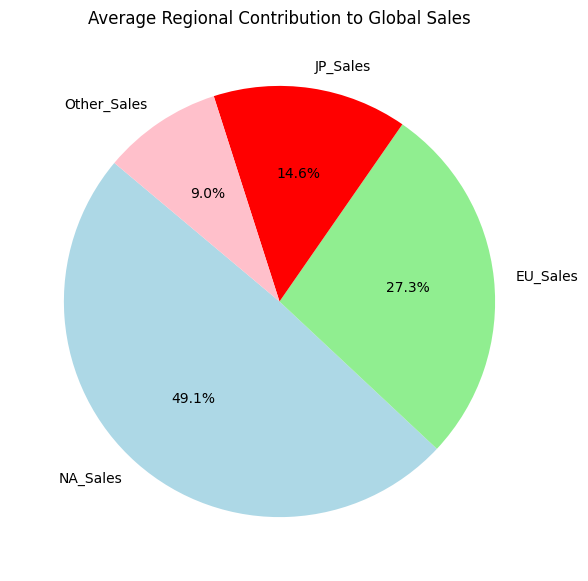

In [45]:
# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(region_avg_sales, labels=region_avg_sales.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'red', 'pink'], startangle=140)

plt.title("Average Regional Contribution to Global Sales")
plt.show()

> NA and EU regions dominate on average sales with 49.1% and 27.3% respectively!

#### Are there platforms whose sales peaked in particular years, indicating platform lifecycle effects?

In [47]:
platform_year_sales = cleaned_dataset.groupby(['Platform', 'Year'])['Global_Sales'].mean().reset_index()

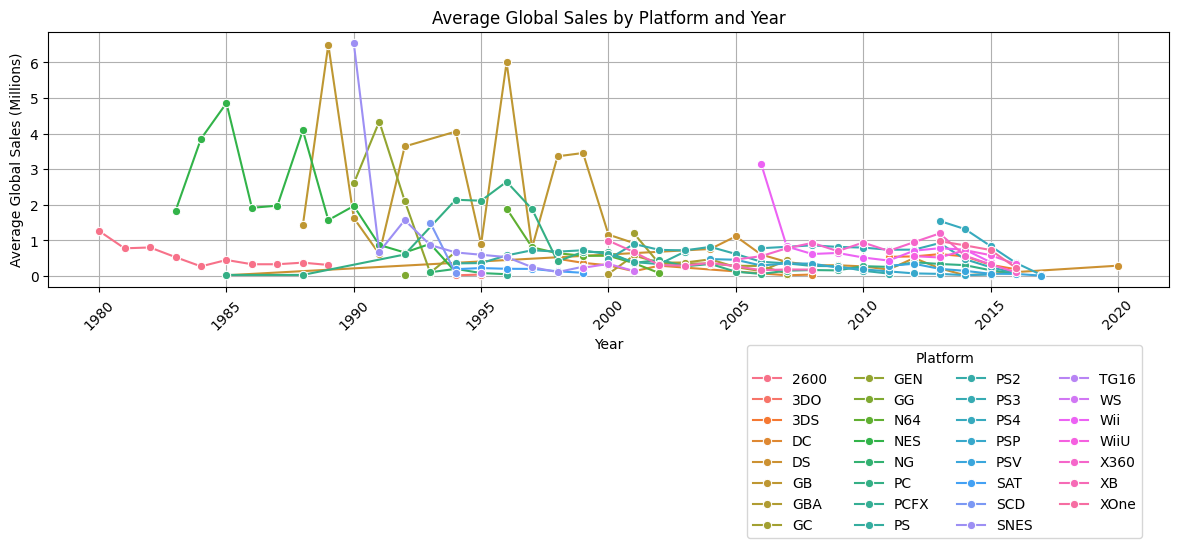

In [58]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=platform_year_sales, x='Year', y='Global_Sales', hue='Platform', marker='o')
plt.title('Average Global Sales by Platform and Year')
plt.xlabel('Year')
plt.ylabel('Average Global Sales (Millions)')
plt.legend(title="Platform", bbox_to_anchor=(0.8, -0.2), loc='upper center', ncol=4)
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. **Early market dominance**: NES and SNES had strong sales peaks in their prime years but declined sharply as newer consoles emerged.
2. **GameBoy sustained success**: Unlike NES and SNES, GameBoy maintained a long period of high sales, indicating strong handheld gaming appeal.
3. **Shift in industry dynamics (post-2000)**: From the 2000s onwards, most platforms show stable yet lower average sales (~0-1 million copies), suggesting market saturation and diversified gaming options.
4. **Wii’s sudden rise and fall**: Wii launched with impressive sales (~3M in 2006) but quickly dropped, showing an intense but short-lived demand.